In [60]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt
import math

In [28]:
# Define a problem and a fitness function
fitness = mlrose.FourPeaks()

# Define the optimization problem object
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

# Define the Randomized Hill Climbing algorithm
rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name="rhc_experiment",
                       iteration_list=list(range(50, 1000, 50)),
                       seed=42,
                       restart_list=[10])

# Run the algorithm and obtain the results
rhc_run_stats, rhc_run_curves = rhc.run()

# Extract the number of function evaluations from the run statistics
fevals = rhc_run_stats['FEvals']

print("Number of function evaluations:", fevals)

Number of function evaluations: 0          0
1         51
2        103
3        153
4        203
       ...  
215    10167
216    10218
217    10269
218    10319
219    10371
Name: FEvals, Length: 220, dtype: int64


In [29]:
rhc_run_stats["max_iters"].value_counts()

max_iters
950    220
Name: count, dtype: int64

In [ ]:
mlrose.RHCRunner()

In [35]:
edges = [(0, 1), (1, 2), (0, 2), (1, 3), (2, 3), (3, 4)]
fitness = mlrose.MaxKColor(edges)
problem = mlrose.DiscreteOpt(length=5, fitness_fn=fitness, maximize=False, max_val=2)

rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name="RHC_final",
                       output_directory="results\k_color_problem",
                       seed=None,
                       iteration_list=2 ** np.arange(14),
                       max_attempts=1000,
                       restart_list=[0])
rhc_run_stats, rhc_run_curves = rhc.run()


sa = mlrose.SARunner(problem=problem,
                     experiment_name="SA_final",
                     output_directory="results\k_color_problem",
                     seed=None,
                     iteration_list=2 ** np.arange(14),
                     max_attempts=1000,
                     temperature_list=[250],
                     decay_list=[mlrose.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()


ga = mlrose.GARunner(problem=problem,
                     experiment_name="GA_final",
                     output_directory="results\k_color_problem",
                     seed=None,
                     iteration_list=2 ** np.arange(14),
                     max_attempts=1000,
                     population_sizes=[100, 200],
                     mutation_rates=[i * 0.1 for i in range(1, 10)])
ga_run_stats, ga_run_curves = ga.run()


mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results\k_color_problem",
                           seed=None,
                           iteration_list=2 ** np.arange(14),
                           population_sizes=[100, 200],
                           max_attempts=500,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()

In [37]:
ga_run_stats

Iteration  Fitness  FEvals      Time            State  Population Size  \
0            0      5.0     100  0.000636  [0, 1, 1, 0, 1]              100   
1            1      0.0     202  0.004144  [0, 0, 0, 0, 0]              100   
2            2      0.0     303  0.007317  [0, 0, 0, 0, 0]              100   
3            4      0.0     505  0.012201  [0, 0, 0, 0, 0]              100   
4            8      0.0     909  0.020918  [0, 0, 0, 0, 0]              100   
..         ...      ...     ...       ...              ...              ...   
265        512      0.0  103113  2.494787  [0, 0, 0, 0, 0]              200   
266       1024      0.0  201402  4.545050  [0, 0, 0, 0, 0]              200   
267       2048      0.0  201402  4.545050  [0, 0, 0, 0, 0]              200   
268       4096      0.0  201402  4.545050  [0, 0, 0, 0, 0]              200   
269       8192      0.0  201402  4.545050  [0, 0, 0, 0, 0]              200   

     Mutation Rate  max_iters  
0              0.1       8192  
1              0.1       8192  
2              0.1       8192  
3              0.1       8192  
4              0.1       8192  
..             ...        ...  
265            0.9       8192  
266            0.9       8192  
267            0.9       8192  
268            0.9       8192  
269            0.9       8192  

[270 rows x 8 columns]

In [11]:
fitness = mlrose.FourPeaks(t_pct=0.1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name="RCH_final",
                       output_directory="results/four_peaks_problem",
                       seed=None,
                       iteration_list=2 ** np.arange(24),
                       max_attempts=1000,
                       restart_list=[0])
rhc_run_stats, rhc_run_curves = rhc.run()


sa = mlrose.SARunner(problem=problem,
                     experiment_name="SA_final",
                     output_directory="results/four_peaks_problem",
                     seed=None,
                     iteration_list=2 ** np.arange(13),
                     max_attempts=1000,
                     temperature_list=[250],
                     decay_list=[mlrose.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()


ga = mlrose.GARunner(problem=problem,
                     experiment_name="GA_final",
                     output_directory="results/four_peaks_problem",
                     seed=None,
                     iteration_list=2 ** np.arange(13),
                     max_attempts=1000,
                     population_sizes=[100, 200],
                     mutation_rates=[i * 0.1 for i in range(1, 10)])
ga_run_stats, ga_run_curves = ga.run()


mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results/four_peaks_problem",
                           seed=None,
                           iteration_list=2 ** np.arange(13),
                           population_sizes=[200],
                           max_attempts=500,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()

In [12]:
fitness = mlrose.Knapsack(weights=[10, 5, 2, 8, 15], values=[1, 2, 3, 4, 5], max_weight_pct=0.4)
problem = mlrose.DiscreteOpt(length=5, fitness_fn=fitness, maximize=True, max_val=2)

rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name="RHC_final",
                       output_directory="results/knapsack_problem",
                       seed=None,
                       iteration_list=2 ** np.arange(14),
                       max_attempts=1000,
                       restart_list=[0])
rhc_run_stats, rhc_run_curves = rhc.run()


sa = mlrose.SARunner(problem=problem,
                     experiment_name="SA_final",
                     output_directory="results/knapsack_problem",
                     seed=None,
                     iteration_list=2 ** np.arange(14),
                     max_attempts=1000,
                     temperature_list=[250],
                     decay_list=[mlrose.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()


ga = mlrose.GARunner(problem=problem,
                     experiment_name="GA_final",
                     output_directory="results/knapsack_problem",
                     seed=None,
                     iteration_list=2 ** np.arange(14),
                     max_attempts=1000,
                     population_sizes=[200],
                     mutation_rates=[0.3])
ga_run_stats, ga_run_curves = ga.run()


mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results/knapsack_problem",
                           seed=None,
                           iteration_list=2 ** np.arange(14),
                           population_sizes=[200],
                           max_attempts=500,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()

In [38]:
import math

def calculate_total_distance(coord_list, state):
    coords = [coord_list[i] for i in state]
    total_distance = 0.0

    # Iterate through the list of coordinates
    for i in range(len(coords) - 1):
        # Calculate the Euclidean distance between consecutive cities
        total_distance += math.sqrt((coords[i+1][0] - coords[i][0])**2 + (coords[i+1][1] - coords[i][1])**2)

    # Add the distance from the last city back to the first city (to complete the loop)
    distance_to_first = math.sqrt((coords[0][0] - coords[i][0])**2 + (coords[0][1] - coords[i][1])**2)
    total_distance += distance_to_first
    return total_distance

In [39]:
import random

# Number of points
num_points = 50

# Define range for random coordinates (adjust as needed)
x_min, x_max = 0, 100
y_min, y_max = 0, 100
i_min, i_max = 0, 100

# Generate random coordinates
points = [(random.uniform(x_min, x_max), random.uniform(y_min, y_max), int(random.uniform(i_min, i_max))) for _ in range(num_points)]

# Print the generated points
for i, point in enumerate(points):
    print(f"Point {i+1}: {point}")

Point 1: (17.2200825920947, 18.195787494514594, 69)
Point 2: (85.32850215721291, 39.08055509302901, 70)
Point 3: (19.018262335329595, 89.50347421663287, 18)
Point 4: (19.801529466588097, 29.114743195156368, 90)
Point 5: (37.962562413422596, 17.32179615526106, 60)
Point 6: (76.69301834443797, 39.70226611395861, 69)
Point 7: (23.050462823171635, 88.47118252377068, 11)
Point 8: (66.87968550167002, 30.018960082604863, 84)
Point 9: (45.44963228649288, 67.76158616566951, 48)
Point 10: (14.442704571386178, 90.23608325632091, 29)
Point 11: (63.825361759800906, 30.678656837876815, 90)
Point 12: (12.643511163516518, 25.86157896719795, 3)
Point 13: (73.95352192229772, 45.78015136196949, 27)
Point 14: (47.14446873230943, 22.14504535771791, 46)
Point 15: (17.591474507145012, 52.49081895335169, 45)
Point 16: (12.336138880441395, 55.28513380712893, 68)
Point 17: (41.306386554479246, 55.584395850453305, 55)
Point 18: (84.66949076580492, 81.266969210171, 8)
Point 19: (45.740530873350316, 97.15285955466

In [44]:
coord_list = points

# Custom fitness function for the TSP
def tsp_fitness(state,max_distance_travelled = 300, item_price = 10, fuel_price = 0.5):

    coords = [coord_list[i] for i in state]
    items_sold = 0
    total_distance = 0.0
    items = 0

    # Iterate through the list of coordinates
    for i in range(len(coords) - 1):
      # Calculate the Euclidean distance between consecutive cities
      total_distance += math.sqrt((coords[i+1][0] - coords[i][0])**2 + (coords[i+1][1] - coords[i][1])**2)
      if total_distance < max_distance_travelled:
        # Calculate the number of items sold
        items = items + coords[i][2]
      else:
        total_distance -= math.sqrt((coords[i+1][0] - coords[i][0])**2 + (coords[i+1][1] - coords[i][1])**2)
        break
    items = items + coords[i][2]

    # # Add the distance from the last city back to the first city (to complete the loop)
    # distance_to_first = math.sqrt((coords[0][0] - coords[i][0])**2 + (coords[0][1] - coords[i][1])**2)
    # total_distance += distance_to_first

    # Total money
    money_earned = items * item_price - total_distance * fuel_price
    print(money_earned, total_distance, i)
    return money_earned


# Create a fitness function object using the custom function
fitness_fn = mlrose.CustomFitness(tsp_fitness, "tsp")

# Define optimization problem object
problem = mlrose.DiscreteOpt(length=len(coord_list), fitness_fn=fitness_fn, maximize=True)

In [99]:
""" Classes for defining fitness functions."""

# Author: Genevieve Hayes (Modified by Andrew Rollings) (Modified by Apratim Bajpai)
# License: BSD 3 clause

import numpy as np
import pandas as pd
import math

class CustomTSP:
    """Fitness function for Travelling Salesman optimization problem.
    Evaluates the fitness of a tour of n nodes, represented by state vector
    :math:`x`, giving the order in which the nodes are visited, as the total
    distance travelled on the tour (including the distance travelled between
    the final node in the state vector and the first node in the state vector
    during the return leg of the tour). Each node must be visited exactly
    once for a tour to be considered valid.

    Parameters
    ----------
    coords: list of pairs, default: None
        Ordered list of the (x, y) coordinates of all nodes (where element i
        gives the coordinates of node i). This assumes that travel between
        all pairs of nodes is possible. If this is not the case, then use
        :code:`distances` instead.

    distances: list of triples, default: None
        List giving the distances, d, between all pairs of nodes, u and v, for
        which travel is possible, with each list item in the form (u, v, d).
        Order of the nodes does not matter, so (u, v, d) and (v, u, d) are
        considered to be the same. If a pair is missing from the list, it is
        assumed that travel between the two nodes is not possible. This
        argument is ignored if coords is not :code:`None`.

    Examples
    --------
    .. highlight:: python
    .. code-block:: python

        >>> import mlrose_hiive
        >>> import numpy as np
        >>> coords = [(0, 0), (3, 0), (3, 2), (2, 4), (1, 3)]
        >>> dists = [(0, 1, 3), (0, 2, 5), (0, 3, 1), (0, 4, 7), (1, 3, 6),
                     (4, 1, 9), (2, 3, 8), (2, 4, 2), (3, 2, 8), (3, 4, 4)]
        >>> fitness_coords = mlrose_hiive.TravellingSales(coords=coords)
        >>> state = np.array([0, 1, 4, 3, 2])
        >>> fitness_coords.evaluate(state)
        13.86138...
        >>> fitness_dists = mlrose_hiive.TravellingSales(distances=dists)
        >>> fitness_dists.evaluate(state)
        29

    Note
    ----
    1. The TravellingSales fitness function is suitable for use in travelling
       salesperson (tsp) optimization problems *only*.
    2. It is necessary to specify at least one of :code:`coords` and
       :code:`distances` in initializing a TravellingSales fitness function
       object.
    """

    def __init__(self, coords=None, distances=None, 
                 max_distance_travelled = 300, 
                 item_price = 10, fuel_price = 0.5):

        if coords is None and distances is None:
            raise Exception("""At least one of coords and distances must be"""
                            + """ specified.""")

        elif coords is not None:
            self.is_coords = True
            path_list = []
            dist_list = []

        else:
            self.is_coords = False

            # Remove any duplicates from list
            distances = list({tuple(sorted(dist[0:2]) + [dist[2]])
                              for dist in distances})

            # Split into separate lists
            node1_list, node2_list, dist_list = zip(*distances)

            if min(dist_list) <= 0:
                raise Exception("""The distance between each pair of nodes"""
                                + """ must be greater than 0.""")
            if min(node1_list + node2_list) < 0:
                raise Exception("""The minimum node value must be 0.""")

            if not max(node1_list + node2_list) == \
                    (len(set(node1_list + node2_list)) - 1):
                raise Exception("""All nodes must appear at least once in"""
                                + """ distances.""")

            path_list = list(zip(node1_list, node2_list))

        self.coords = coords
        self.distances = distances
        self.path_list = path_list
        self.dist_list = dist_list
        self.prob_type = 'tsp'
        self.max_distance_travelled = max_distance_travelled
        self.item_price = item_price
        self.fuel_price = fuel_price
        
        
        if self.coords:
            self.calculate_fitness = self.__calculate_fitness_by_coords
        else:
            self.df_path_list = pd.DataFrame([[self.path_list[i][0], self.path_list[i][1], self.dist_list[i]] for i in range(len(self.path_list))])
            self.calculate_fitness = self.__calculate_fitness_by_distance

    def evaluate(self, state):
        """Evaluate the fitness of a state vector.

        Parameters
        ----------
        state: array
            State array for evaluation. Each integer between 0 and
            (len(state) - 1), inclusive must appear exactly once in the array.

        Returns
        -------
        fitness: float
            Value of fitness function. Returns :code:`np.inf` if travel between
            two consecutive nodes on the tour is not possible.
        """

        if self.is_coords and len(state) != len(self.coords):
            raise Exception("""state must have the same length as coords.""")

        if not len(state) == len(set(state)):
            raise Exception("""Each node must appear exactly once in state.""")

        if min(state) < 0:
            raise Exception("""All elements of state must be non-negative"""
                            + """ integers.""")

        if max(state) >= len(state):
            raise Exception("""All elements of state must be less than"""
                            + """ len(state).""")

        return self.calculate_fitness(state)

    def __calculate_fitness_by_coords(self, state):
        # Calculate length of journey
        
        coords = [self.coords[i] for i in state]
        total_distance = 0.0
        items = 0

        # Iterate through the list of coordinates
        for i in range(len(coords) - 1):
            # Calculate the Euclidean distance between consecutive cities
            total_distance += math.sqrt((coords[i+1][0] - coords[i][0])**2 + (coords[i+1][1] - coords[i][1])**2)
            if total_distance < self.max_distance_travelled:
                # Calculate the number of items sold
                items = items + coords[i][2]
            else:
                total_distance -= math.sqrt((coords[i+1][0] - coords[i][0])**2 + (coords[i+1][1] - coords[i][1])**2)
                break
            items = items + coords[i][2]
        
        
        # Total money
        fitness = items * self.item_price - total_distance * self.fuel_price 
        # ls = len(state)
        # nodes = np.array([self.coords[state[i]] for i in range(ls)] + [self.coords[state[0]]])
        # nodes.reshape((2, nodes.size // 2))
        # fitness = np.linalg.norm(nodes[1:] - nodes[:-1], axis=1).sum()

        return fitness

    def __calculate_fitness_by_distance(self, state):

        ls = len(state)

        nodes = np.array([[state[i-1], state[i]] for i in range(1, ls)] + [[state[ls-1]] + [state[0]]])
        nodes.sort(axis=1)
        df_nodes = pd.merge(self.df_path_list, pd.DataFrame(nodes), how='inner')
        if df_nodes.shape[0] != nodes.shape[0]:
            return np.inf
        fitness = df_nodes.iloc[:, 2].sum()
        return fitness

    def get_prob_type(self):
        """ Return the problem type.

        Returns
        -------
        self.prob_type: string
            Specifies problem type as 'discrete', 'continuous', 'tsp'
            or 'either'.
        """
        return self.prob_type


In [100]:

coords_list = [(1, 1, 4), (4, 2, 3), (5, 2, 5), (6, 4, 1), (4, 4, 4), (3, 6, 8), (1, 5, 5), (2, 3, 1)]

coords_list = points

# Initialize fitness function object using coords_list
fitness_coords = CustomTSP(coords = coords_list, 
                                  max_distance_travelled = 300, 
                                  item_price = 10, fuel_price = 0.5)

# Define the problem object
problem = mlrose.TSPOpt(length=len(coords_list), fitness_fn = fitness_coords, maximize=True)

In [102]:
rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name="RHC_final",
                       output_directory="results/CustomTSP_problem",
                       seed=None,
                       iteration_list=2 ** np.arange(14),
                       max_attempts=1000,
                       restart_list=[0])
rhc_run_stats, rhc_run_curves = rhc.run()


sa = mlrose.SARunner(problem=problem,
                     experiment_name="SA_final",
                     output_directory="results/CustomTSP_problem",
                     seed=None,
                     iteration_list=2 ** np.arange(14),
                     max_attempts=1000,
                     temperature_list=[250],
                     decay_list=[mlrose.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()


ga = mlrose.GARunner(problem=problem,
                     experiment_name="GA_final",
                     output_directory="results/CustomTSP_problem",
                     seed=None,
                     iteration_list=2 ** np.arange(14),
                     max_attempts=1000,
                     population_sizes=[200],
                     mutation_rates=[0.3])
ga_run_stats, ga_run_curves = ga.run()


mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results/CustomTSP_problem",
                           seed=None,
                           iteration_list=2 ** np.arange(14),
                           population_sizes=[200],
                           max_attempts=500,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()

In [108]:
rhc_run_stats

Iteration       Fitness  FEvals      Time  \
0           0   6731.577778       0  0.000092   
1           1   6731.577778       1  0.561692   
2           2   6731.577778       2  0.563335   
3           4   6731.577778       4  0.564987   
4           8   6736.812560       9  0.566643   
5          16   6736.812560      17  0.568436   
6          32   8977.420763      35  0.570525   
7          64  10171.081438      68  0.573129   
8         128  13751.039400     138  0.578192   
9         256  13813.689172     268  0.586349   
10        512  15452.418722     533  0.608014   
11       1024  19123.440649    1053  0.676875   
12       2048  21095.017622    2089  0.920188   
13       4096  22652.808527    4144  1.819397   
14       8192  22652.808527    4972  2.341905   

                                                State  Restarts  max_iters  \
0   [10, 36, 26, 1, 4, 2, 43, 46, 19, 24, 42, 30, ...         0       8192   
1   [10, 36, 26, 1, 4, 2, 43, 46, 19, 24, 42, 30, ...         0       8192   
2   [10, 36, 26, 1, 4, 2, 43, 46, 19, 24, 42, 30, ...         0       8192   
3   [10, 36, 26, 1, 4, 2, 43, 46, 19, 24, 42, 30, ...         0       8192   
4   [10, 36, 26, 1, 4, 2, 43, 46, 25, 24, 42, 30, ...         0       8192   
5   [10, 36, 26, 1, 4, 2, 43, 46, 25, 24, 42, 30, ...         0       8192   
6   [10, 36, 26, 1, 4, 13, 7, 46, 25, 24, 42, 30, ...         0       8192   
7   [10, 36, 26, 1, 4, 13, 7, 5, 25, 24, 42, 30, 2...         0       8192   
8   [47, 36, 24, 1, 4, 10, 7, 5, 44, 3, 42, 30, 27...         0       8192   
9   [47, 37, 24, 1, 7, 10, 4, 5, 44, 3, 42, 30, 27...         0       8192   
10  [21, 3, 5, 1, 7, 10, 26, 24, 0, 44, 14, 15, 27...         0       8192   
11  [35, 3, 5, 10, 7, 1, 26, 24, 18, 19, 21, 15, 4...         0       8192   
12  [35, 3, 4, 10, 7, 1, 26, 24, 18, 25, 34, 21, 1...         0       8192   
13  [35, 11, 4, 10, 7, 5, 1, 24, 18, 25, 34, 21, 1...         0       8192   
14  [35, 11, 4, 10, 7, 5, 1, 24, 18, 25, 34, 21, 1...         0       8192   

    current_restart  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7                 0  
8                 0  
9                 0  
10                0  
11                0  
12                0  
13                0  
14                0

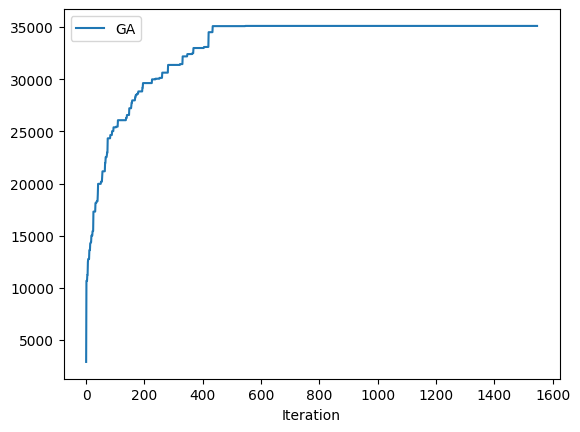

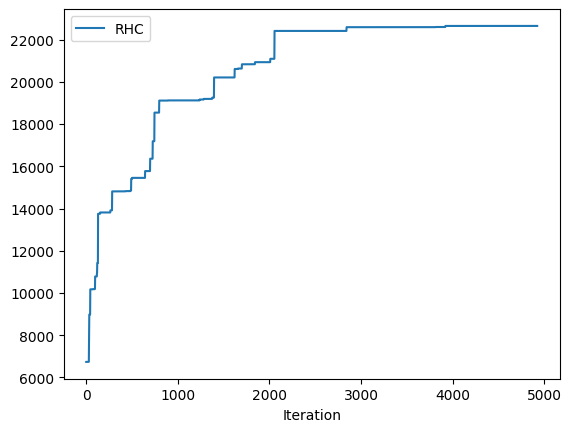

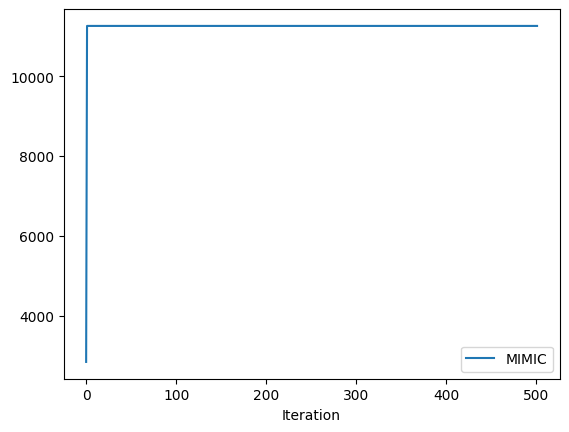

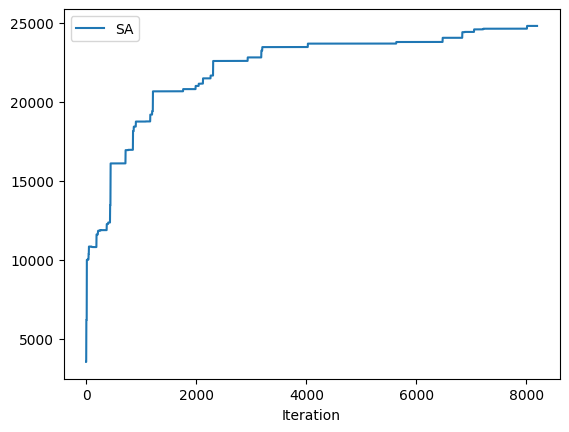

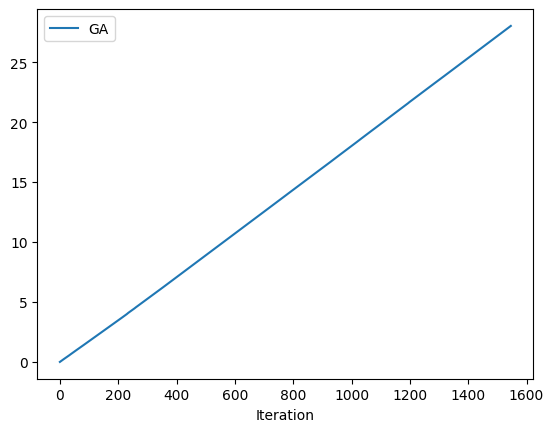

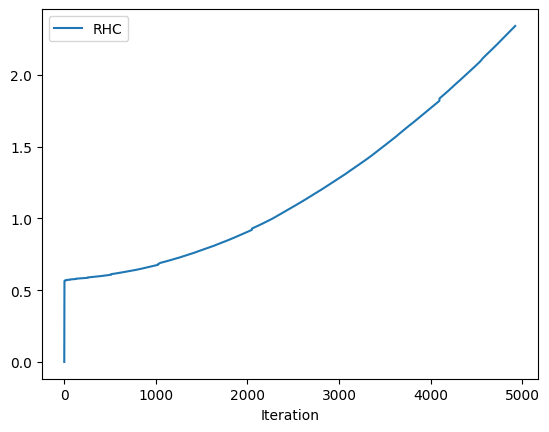

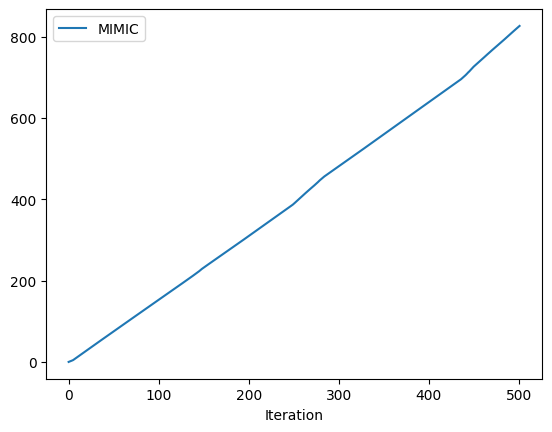

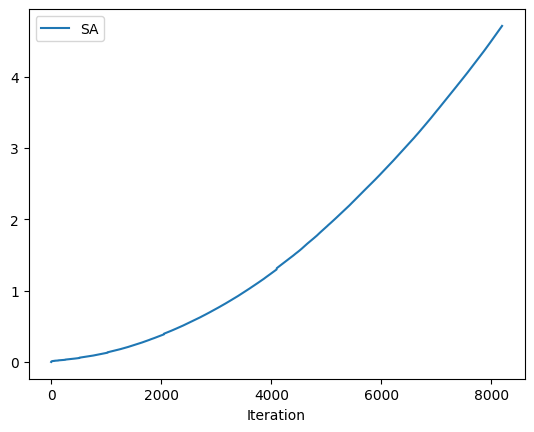

In [103]:
def plot_curves():
    for y in ["Fitness", "Time"]:
        ga_run_curves.plot(x = "Iteration", y = y, label="GA")
        rhc_run_curves.plot(x = "Iteration", y = y, label="RHC")
        mimic_run_curves.plot(x = "Iteration", y = y, label="MIMIC")
        sa_run_curves.plot(x = "Iteration", y = y, label="SA")
        plt.show()
    
plot_curves()    

In [90]:

import ast
def convert_string_to_list(string):
    # Use ast.literal_eval to safely evaluate the string
    return ast.literal_eval(string)

# Example string
string = ga_run_stats["State"].iloc[-1]

# Convert the string to a list
best_state = convert_string_to_list(string)
print(best_state[0:33])

[24, 26, 12, 1, 5, 7, 10, 13, 31, 20, 4, 36, 42, 28, 47, 0, 35, 11, 3, 14, 49, 30, 15, 21, 34, 19, 38, 9, 25, 2, 6, 33, 46]


In [91]:
def path_travelled(best_state, max_distance_travelled = 300):
  # Iterate through the list of coordinates
  travel = []
  total_distance = 0
  coords = [coord_list[i] for i in best_state]
  for i in range(len(best_state) - 1):
    # Calculate the Euclidean distance between consecutive cities
    total_distance += math.sqrt((coords[i+1][0] - coords[i][0])**2 + (coords[i+1][1] - coords[i][1])**2)
    if total_distance < max_distance_travelled:
      travel.append(coords[i])
    else:
      return(travel)

In [136]:
np.round(rhc_run_stats.Fitness.iloc[-1])

22653.0

In [139]:
# Plot the path
def plot_travel(coords = coords_list,
                rhc_run_stats = rhc_run_stats,
                ga_run_stats = ga_run_stats,
                sa_run_stats = sa_run_stats,
                mimic_run_stats = mimic_run_stats):
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    l = 0
    for stat, name in zip([rhc_run_stats, ga_run_stats, sa_run_stats, mimic_run_stats],
                          ["RHC", "GA", "SA", "MIMIC"]):
        best_state = convert_string_to_list(stat.State.iloc[-1])
        travel =  path_travelled(best_state,max_distance_travelled = 300)
        print(len(travel))
        ax[l].scatter([i for i,_,_ in coords], [j for _,j,_ in coords], sizes =[k for _,_,k in coords])
        ax[l].plot([i for i,_,_ in travel], [j for _,j,_ in travel])
        ax[l].set_title(f"{name}, {int(stat.Fitness.iloc[-1])}")
        l += 1
    # plt.plot([travel[-1][0], travel[0][0]] , [travel[-1][1], travel[0][1]], 'b')

16
34
20
8


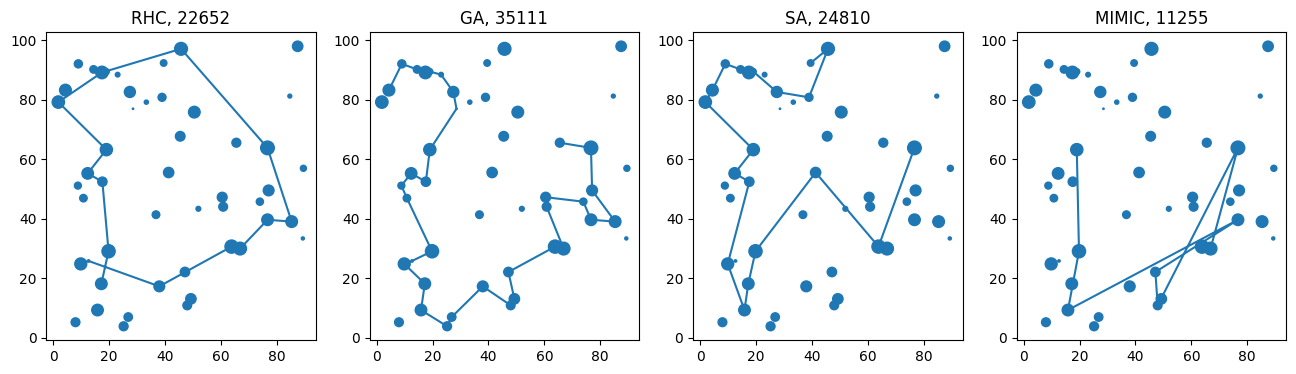

In [140]:
plot_travel()

In [71]:

# Extract the number of function evaluations from the run statings

# Extract the number of function evaluations from the run statistics
fevals = ga_run_stats['FEvals']
fevals

0        200
1        402
2        604
3       1006
4       1812
5       3421
6       6637
7      13069
8      25933
9      51661
10    103117
11    203818
12    203818
13    203818
14    203818
Name: FEvals, dtype: int64

In [45]:
rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name="RHC_final",
                       output_directory="results/tsp",
                       seed=None,
                       iteration_list=2 ** np.arange(14),
                       max_attempts=1000,
                       restart_list=[0])
rhc_run_stats, rhc_run_curves = rhc.run()


sa = mlrose.SARunner(problem=problem,
                     experiment_name="SA_final",
                     output_directory="results/tsp",
                     seed=None,
                     iteration_list=2 ** np.arange(14),
                     max_attempts=1000,
                     temperature_list=[250],
                     decay_list=[mlrose.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()


ga = mlrose.GARunner(problem=problem,
                     experiment_name="GA_final",
                     output_directory="results/tsp",
                     seed=None,
                     iteration_list=2 ** np.arange(14),
                     max_attempts=1000,
                     population_sizes=[200],
                     mutation_rates=[0.3])
ga_run_stats, ga_run_curves = ga.run()


mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results/tsp",
                           seed=None,
                           iteration_list=2 ** np.arange(14),
                           population_sizes=[200],
                           max_attempts=500,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()

6777.52290944433 284.95418111133966 9
6777.52290944433 284.95418111133966 9
6777.52290944433 284.95418111133966 9
10937.52290944433 284.95418111133966 15
10937.52290944433 284.95418111133966 15
10937.52290944433 284.95418111133966 15
10937.52290944433 284.95418111133966 15
10947.52290944433 284.95418111133966 15
10947.52290944433 284.95418111133966 15
10947.52290944433 284.95418111133966 15
10957.52290944433 284.95418111133966 15
10957.52290944433 284.95418111133966 15
6797.52290944433 284.95418111133966 9
10957.52290944433 284.95418111133966 15
10957.52290944433 284.95418111133966 15
10967.52290944433 284.95418111133966 15
10967.52290944433 284.95418111133966 15
10967.52290944433 284.95418111133966 15
10957.52290944433 284.95418111133966 15
10967.52290944433 284.95418111133966 15
10957.52290944433 284.95418111133966 15
10967.52290944433 284.95418111133966 15
10967.52290944433 284.95418111133966 15
10967.52290944433 284.95418111133966 15
10967.52290944433 284.95418111133966 15
10967.52

TypeError: list indices must be integers or slices, not numpy.float64

In [47]:
ga_run_curves

Iteration      Time       Fitness    FEvals  Population Size  \
0             0  0.003374   4727.522909     200.0              200   
1             1  0.011624  15197.522909     402.0              200   
2             2  0.019136  15197.522909     603.0              200   
3             3  0.026661  17227.522909     805.0              200   
4             4  0.032414  17907.522909    1007.0              200   
...         ...       ...           ...       ...              ...   
1192       1192  8.414780  35000.000000  239834.0              200   
1193       1193  8.421440  35000.000000  240035.0              200   
1194       1194  8.428099  35000.000000  240236.0              200   
1195       1195  8.435105  35000.000000  240437.0              200   
1196       1196  8.442120  35000.000000  240638.0              200   

      Mutation Rate  max_iters  
0               0.3       8192  
1               0.3       8192  
2               0.3       8192  
3               0.3       8192  
4               0.3       8192  
...             ...        ...  
1192            0.3       8192  
1193            0.3       8192  
1194            0.3       8192  
1195            0.3       8192  
1196            0.3       8192  

[1197 rows x 7 columns]